# **Capstone Project - LNG Trading**

## Objectives

The objective of this notebook is to analyse data from the International Energy Agency (IEA) and US Energy Information Administration (EIA) to inform trading strategies for a US-based investment firm with a mandate to invest in energy and commodities, and a stated focus on liquefied natural gas (LNG).

## Inputs

* Write down which data or information you need to run the notebook 
* import numpy as np
* import pandas as pd
* import matplotlib.pyplot as plt
* import plotly.graph_objects as go

## Outputs

* https://public.tableau.com/app/profile/saad.ahmed1183/viz/LNGTradeFlows/Dashboard1_1

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

To analyse the international gas flows dataset from the IEA, we must import Numpy and Pandas, and read the csv file. After this, it should be printed.

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('/Users/saad/Documents/vscode-projects/capstone/Export_GTF_IEA_202412 - GTF_data.csv')
print (df)

         Borderpoint                   Exit        Entry  MAXFLOW (Mm3/h)  \
0       Adriatic LNG  Liquefied Natural Gas        Italy              1.1   
1            Almeria                Algeria        Spain              1.3   
2         Alveringem                Belgium       France              1.1   
3         Alveringem                 France      Belgium              1.1   
4            Badajoz               Portugal        Spain              0.3   
..               ...                    ...          ...              ...   
257    Zelzate (GTS)                Belgium  Netherlands              NaN   
258    Zelzate (GTS)            Netherlands      Belgium              NaN   
259  Zelzate (Zebra)                Belgium  Netherlands              NaN   
260         Zevenaar                Germany  Netherlands              NaN   
261         Zevenaar            Netherlands      Germany              1.9   

     Oct-08  Nov-08  Dec-08  Jan-09  Feb-09  Mar-09  ...  Mar-24  Apr-24  \

Now we need to check the attributes of the newly created DataFrame, such as the size, and if there are any missing or duplicate values.

In [4]:
df.describe()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 199 entries, Borderpoint to Dec-24
dtypes: float64(196), object(3)
memory usage: 407.5+ KB


Borderpoint         0
Exit                0
Entry               0
MAXFLOW (Mm3/h)    59
Oct-08             37
                   ..
Aug-24             41
Sep-24             42
Oct-24             38
Nov-24             36
Dec-24             47
Length: 199, dtype: int64

This dataset has 8 rows and 196 columns, the RangeIndex is 262 entries, the columns have 199 entries, with a borderpoint to Dec-24. Of the data types, there are 196 floats and 3 objects. There are no null values in Borderpoint, Exit, and Entry, the three categorical values, and there are some values of 0 in the numerical variables, which is to be expected. These can be investigated later with visualisation. This includes the 59 entries of N/A in MAXFLOW (Mm3/h).

For the purposes of this analysis, I will not analyse Borderpoint, focusing on Exit and Entry to denote countries of origin and destination. I will also not examine MAXFLOW for now as it is absolute volume that is relevant.

---

# Section 2

Now I will do some basic visualisations with this dataset in Pandas, starting with a pie chart for total exports in 2024. To do this, I create a DataFrame that adds together all of the monthly numbers for that year, then group by the Exit variable, and import Matplotlib.

<Axes: title={'center': 'Total Gas Exports by Country in 2024'}, ylabel='total_exports_2024'>

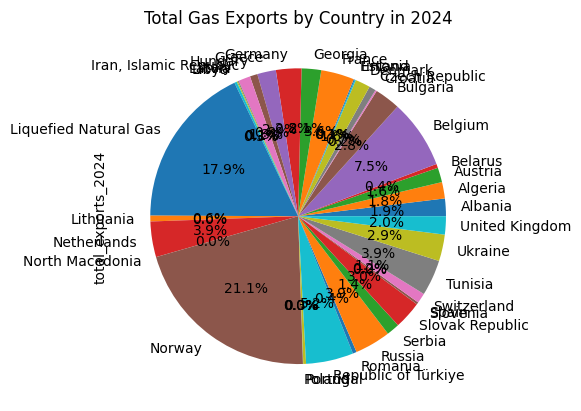

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/Users/saad/Documents/vscode-projects/capstone/Export_GTF_IEA_202412 - GTF_data.csv')

df['total_exports_2024'] = df[['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 
                               'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 
                               'Nov-24', 'Dec-24']].sum(axis=1)

exports_2024 = df.groupby('Exit')['total_exports_2024'].sum()
exports_2024.plot(kind='pie', title='Total Gas Exports by Country in 2024', autopct='%1.1f%%')


This is quite difficult to read and not useful as a visualisation on that basis. The label of 'Liquefied Natural Gas' as an Exit country I will take to denote an unknown or unrecorded origin.

I will plot demand through a line graph for EU countries in November, December, January, and February of 2024.

<Axes: title={'center': 'Total Gas Imported into the EU in 2024'}, ylabel='Gas Imported (per million cubic metres)'>

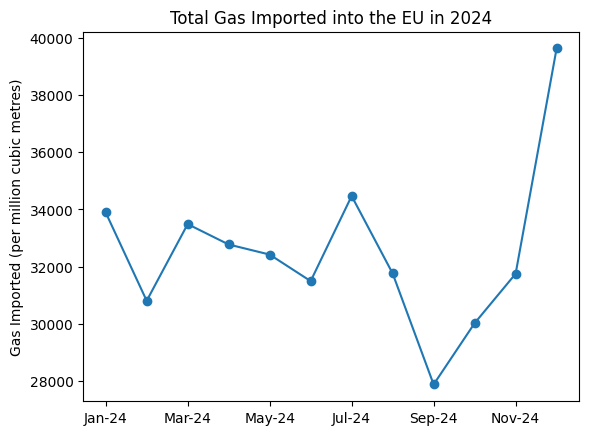

In [20]:
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]
df_eu = df[df['Entry'].isin(eu_countries)]
df_eu_sum = df_eu[['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24']].sum()
df_eu_sum.plot(kind='line', marker='o', title='Total Gas Imported into the EU in 2024', ylabel='Gas Imported (per million cubic metres)')

This line graph shows that gas imported into the EU declines from 34,000 million cubic metres in January 2024 before rising again in February 2024. It then steadily falls until June, then steadily increases until June before rising to just over January's level. There is then a steep decline in EU gas imports to a nadir in September, before rising again, and peaking in December 2024 at almost 40,000 million cubic metres. This means that EU countries imported most of their gas in December 2024, which is consistent with the hypothesis that EU countries typically have a higher demand. To further support this, I will generate a line graph to see the export trends from the EU during the same period.

<Axes: title={'center': 'Total Gas Exported from the EU in 2024'}, ylabel='Gas Exported (per million cubic metres)'>

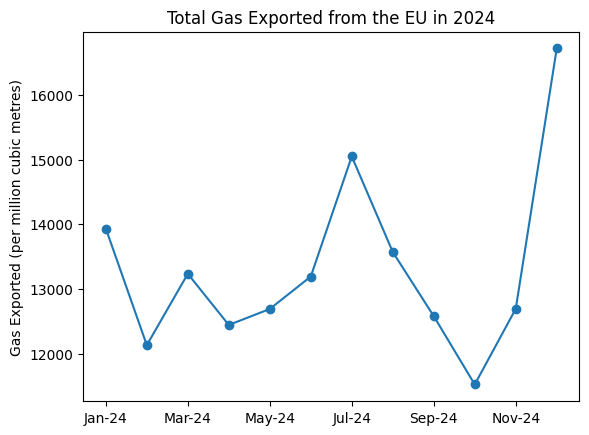

In [21]:
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]
df_eu = df[df['Exit'].isin(eu_countries)]
df_eu_sum = df_eu[['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24']].sum()
df_eu_sum.plot(kind='line', marker='o', title='Total Gas Exported from the EU in 2024', ylabel='Gas Exported (per million cubic metres)')

From this line graph we can see that EU countries on the aggregate exported less LNG than they imported in 2024, with even the export peak of approximately 17,000 million cubic metres in December 2024 dwarfed by the import peak of almost 40,000 million cubic metres in that same month. It would be useful to disaggregate to determine why import and export trends seem to match. However, the second hypothesis is satisfied as LNG producers export less during winter. I will now generate a scatter plot to analyse LNG import trends from the United Kingdom in 2024, as a test case outside of the EU that still experiences winter at the same time by virtue of being in Europe.

<Axes: title={'center': 'UK LNG Imports in 2024'}>

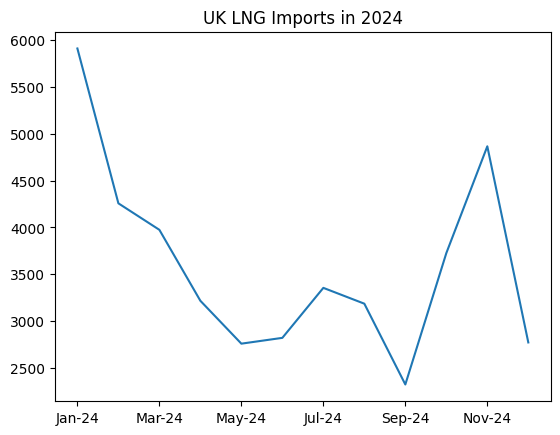

In [22]:
df_uk = df[df['Entry'] == 'United Kingdom']
uk_imports_2024 = df_uk[['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 
                         'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 
                         'Nov-24', 'Dec-24']].sum()
uk_imports_2024.plot(kind='line', x=uk_imports_2024.index, y=uk_imports_2024.values, title='UK LNG Imports in 2024')


This line graph shows us that the UK imported just under 6000 million cubic metres of LNG in January 2024, which continued to trend down throughout the year, with a small rise in July 2024, before a sharp rise in September of that year to circa 5000 million cubic metres in November 2024, before falling rapidly to the end of the year.

I am interested in visually representing where the EU gas flows are headed. I suspect that there is a significant amount of trading of LNG between EU countries, which could help to explain the similar trends in import and export peaks and troughs. Furthermore, this would help the business case by showing potential opportunities for arbitrage by US gas traders. This is something that I can visualise, among other things, in Tableau.

In [ ]:
import plotly.graph_objects as go

df_germany = df[df['Entry'] == 'Germany']
exit_sums = df_germany.groupby('Exit').sum().sum(axis=1)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Germany"] + exit_sums.index.tolist(),  # Germany as source, destinations as exits
        color="blue"
    ),
    link=dict(
        source=[0] * len(exit_sums),  # Germany is the source (index 0)
        target=list(range(1, len(exit_sums) + 1)),  # Destination countries are the targets
        value=exit_sums.tolist()  # Total LNG exports from Germany to each destination
    )
)])

fig.update_layout(title_text="Germany LNG Export Destinations 2024", font_size=10)
fig.show()


TypeError: can only concatenate str (not "float") to str

I have tried to create a Sankey diagram to show where Germany exports gas to, but my code is not working. This is another visualisation I will potentially explore in Tableau, alongside the destinations for LNG exports for EU countries.

---

# Section 3 - Tableau visualisations

Have imported the dataset into Tableau, however the format of it is not conducive to analysis. Need to reshape, melt columns for months together, and make it more intuitive. Queried with ChatGPT, was given incorrect code, and have now edited it.

In [ ]:
import pandas as pd

df = pd.read_csv('/Users/saad/Documents/vscode-projects/capstone/Export_GTF_IEA_202412 - GTF_data.csv')

df_melted = df.melt(id_vars=["Borderpoint", "Exit", "Entry"], var_name="Month", value_name="Flow Volume")

df_melted["Month"] = pd.to_datetime(df_melted["Month"], format="%b-%y", errors="coerce")

output_path = "/Users/saad/Documents/vscode-projects/capstone/LNG_Flow_Formatted.csv"
df_melted.to_csv(output_path, index=False)

df_melted.head()


,Borderpoint,Exit,Entry,Month,Flow Volume
0,Adriatic LNG,Liquefied Natural Gas,Italy,NaT,1.1
1,Almeria,Algeria,Spain,NaT,1.3
2,Alveringem,Belgium,France,NaT,1.1
3,Alveringem,France,Belgium,NaT,1.1
4,Badajoz,Portugal,Spain,NaT,0.3


---

# Section 4 - LNG Prices

Will now analyse the US LNG prices. Initially will load the csv file as a DataFrame, describe it, find out the info, and check for null values.

In [10]:
import numpy as np
import pandas as pd
df2 = pd.read_csv('/Users/saad/Documents/vscode-projects/capstone/Price_of_Liquefied_US_Natural_Gas_Exports.csv')
print(df2)

        Month  \
0    Dec 2024   
1    Nov 2024   
2    Oct 2024   
3    Sep 2024   
4    Aug 2024   
..        ...   
289  May 1997   
290  Apr 1997   
291  Mar 1997   
292  Feb 1997   
293  Jan 1997   

     Price of Liquefied U.S. Natural Gas Exports  Dollars per Thousand Cubic Feet  
0                                                 7.67                             
1                                                 6.70                             
2                                                 6.86                             
3                                                 6.09                             
4                                                 5.77                             
..                                                 ...                             
289                                               3.98                             
290                                               4.06                             
291                                    

In [11]:
df2.describe()
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Month                                                                         294 non-null    object 
 1   Price of Liquefied U.S. Natural Gas Exports  Dollars per Thousand Cubic Feet  294 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


Month                                                                           0
Price of Liquefied U.S. Natural Gas Exports  Dollars per Thousand Cubic Feet    0
dtype: int64

This dataset seems clean, and is ready to be analysed. I will do most of this in Tableau, but will create a line graph to show US LNG export prices in 2024.

/var/folders/d1/dlq091094qq2zc0ry0t_h9180000gn/T/ipykernel_756/1802301216.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Month'] = pd.to_datetime(df2['Month'], errors='coerce')


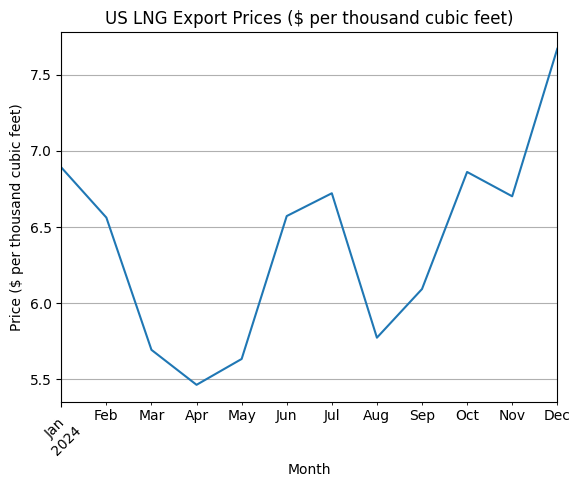

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df2['Month'] = pd.to_datetime(df2['Month'], errors='coerce')

df2_2024 = df2[df2['Month'].dt.year == 2024].sort_values(by='Month')

df2_2024.plot(
    kind='line',
    x='Month',  # X-axis: Properly sorted dates
    y='Price of Liquefied U.S. Natural Gas Exports  Dollars per Thousand Cubic Feet',
    title='US LNG Export Prices ($ per thousand cubic feet)',
    legend=False
)

plt.xlabel('Month')
plt.ylabel('Price ($ per thousand cubic feet)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


US LNG prices started the year at $6.89 per thousand cubic feet in January, and the graph shows us that prices declined to a nadir in April 2024 of $5.46 per thousand cubic feet. Prices then increased until July, fell sharply to August, before increasing again to reach close to January 2024's prices in October at $6.86. There was another small decline, before a rapid rise, peaking at $7.67 per thousand cubic feet. I will generate a line graph for 2023 also to see if there are similarities in price trends.

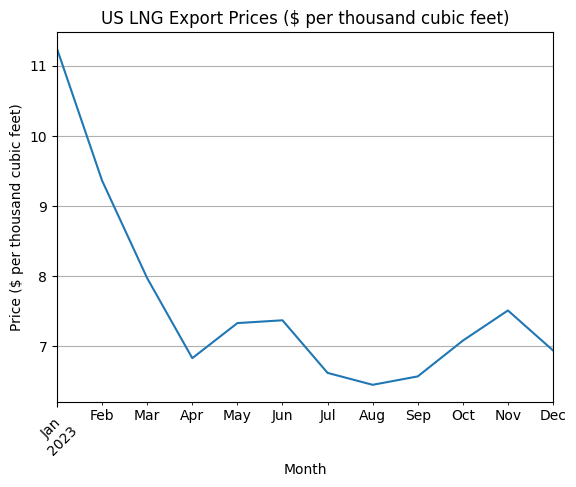

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df2['Month'] = pd.to_datetime(df2['Month'], errors='coerce')

df2_2023 = df2[df2['Month'].dt.year == 2023].sort_values(by='Month')

df2_2023.plot(
    kind='line',
    x='Month',  # X-axis: Properly sorted dates
    y='Price of Liquefied U.S. Natural Gas Exports  Dollars per Thousand Cubic Feet',
    title='US LNG Export Prices ($ per thousand cubic feet)',
    legend=False
)

plt.xlabel('Month')
plt.ylabel('Price ($ per thousand cubic feet)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

US LNG export prices were overall higher in 2023, starting at the peak of $11.24 in January 2023. Prices followed the same trend of declining to April and increasing to the summer months, though this stopped June at $7.37 before actually declining to July to $6.62 and continuing to crater, reaching a nadir in August 2023, which is consistent with 2024's trends, though the August nadir of 2023 was $6.64 per thousand cubic feet. In 2023, unlike 2024 where prices rose until October, prices rose until November, and then began to fall, ending the year at $6.94. Save for some earlier peaks, 2023 and 2024 show broadly consistent seasonal patterns.

I will now import this US LNG export prices dataset into Tableau to add to visualise and add to the dashboards for 2023 and 2024, to correlate with the other items on there.

Tableau dashboard has been created showing LNG flows in 2023 and 2024, and US LNG export prices in 2023 and 2024. It can be found here: https://public.tableau.com/app/profile/saad.ahmed1183/viz/LNGTradeFlows/Dashboard1_1

---

# Conclusions and Next Steps

From this analysis of the LNG trade flows and US export prices, we can see that there is opportunity for the investment fund to look at making money from the trade in LNG by factoring in price fluctuations, and being aware of when demand for LNG spikes in Europe. 

Furthermore, traders and investors can see the shape of the LNG trade in Europe, Eurasia, the Middle East, and North Africa, in terms of export countries and import destinations, and its frequency, and  determine the advantageous points of year in which to sell any investments in LNG based on these historical data. Special attention should be paid to Germany as it is the largest importer of LNG in the European Union.

The next steps would be to conduct further analysis on existing export destinations for US LNG, as well as building a predictive model for US LNG export prices, especially given the marked decline in absolute values between 2023 and 2024. 